In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, complete_graph
from networkx.generators import circulant_graph

In [2]:
# warnings are not important :)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import graph module
import sys
sys.path.append("../")
from methods.gradient_tracking import *

## Preparation

In [4]:
N = 20
#G = complete_graph(N)
G = circulant_graph(N, [1])

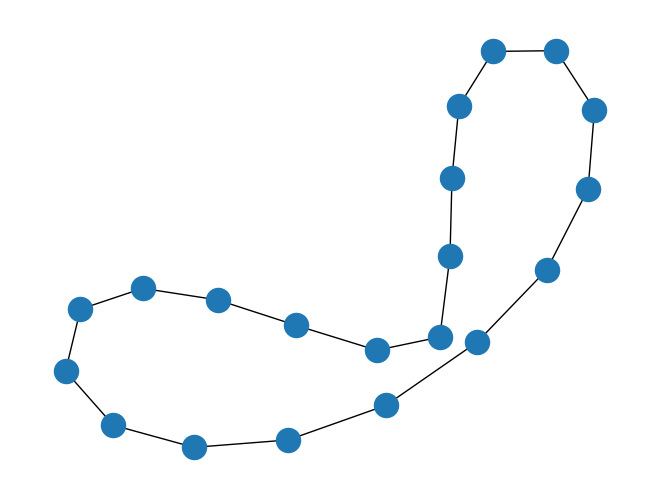

In [5]:
nx.draw(G)

In [6]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

In [7]:
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.random()
    #G.edges[u,v]['weight'] = 1/3
#for i in range(len(G.nodes())):
#    G.add_edge(i, i, weight=1/3)

In [8]:
nx.adjacency_matrix(G).todense()

matrix([[0.        , 0.51355343, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.72607714],
        [0.51355343, 0.        , 0.24980116, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.24980116, 0.        , 0.07443917, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.07443917, 0.        , 0.70192389,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        

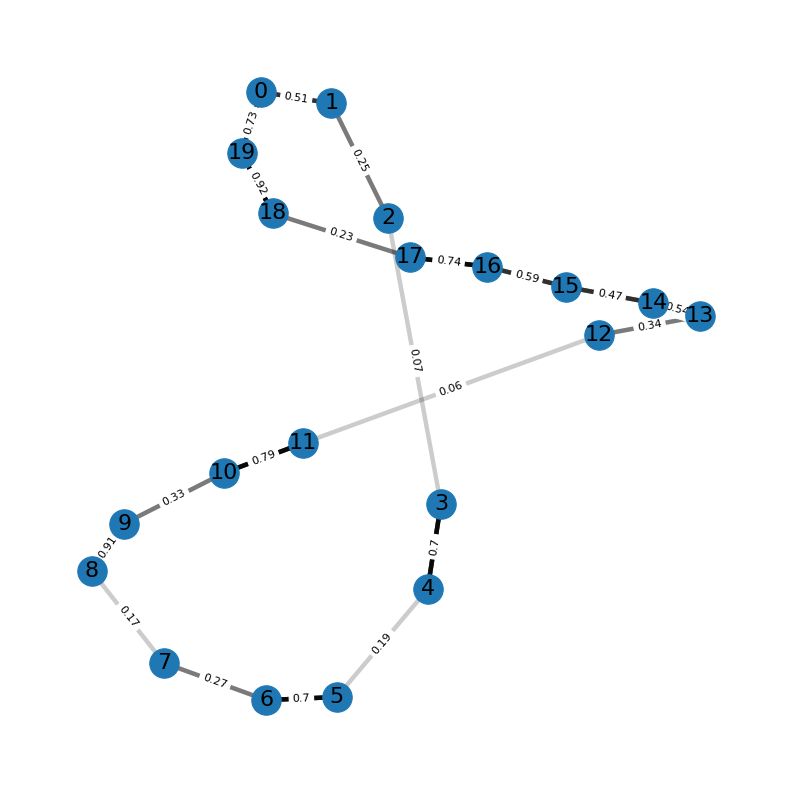

In [9]:
#elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

w_08 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.8]
w_06 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.6]
w_04 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.4]
w_02 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.2]
w_00 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.0]


pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

edge_labels = nx.get_edge_attributes(G, "weight")
for key in edge_labels:
    edge_labels[key] = np.round(edge_labels[key], 2)

plt.figure(figsize=(10, 10), dpi=80)
    
nx.draw_networkx_nodes(G, pos, node_size=700)

nx.draw_networkx_edges(G, pos, edgelist=w_08, width=4, alpha=1.0)
nx.draw_networkx_edges(G, pos, edgelist=w_06, width=4, alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=w_04, width=4, alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=w_02, width=4, alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=w_00, width=4, alpha=0.2)

#nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Examples

In [10]:
def logres_fun(X):
    return 1/(1+np.exp(X))

def delta_Fx(X_):
    return [np.exp(-X) / ((1+np.exp(X))**2) for X in np.array(X_)]

def F(W, X):
    return W * logres_fun(X)

def calc_delta_Fx(W, X):
    return W * delta_Fx(X)

In [11]:
#def F(X):
#    return W * X**2

#def calc_delta_Fx(W, X):
#    return W * 2 * X

0 	X:	 [[-1.43090191  0.85003977  1.75268813  2.40434261  3.29604015  4.00357661
   4.85872088  5.99985623  6.2621321   7.03882262  7.83224733  9.04295636
  10.29281207 10.54096831 11.19565264 11.90001021 12.2645098  13.71254978
  14.06486482 15.44031802]]
0 	S:	 [[1.97977981e-01 8.68012871e-03 3.22025237e-02 5.50618570e-04
  1.03607235e-04 1.48400318e-05 7.86403009e-07 5.76127751e-08
  7.38281820e-10 1.19872416e-10 1.15294153e-11 4.98048294e-13
  4.27037820e-15 9.61932513e-17 4.26818236e-17 2.93592507e-18
  1.60603875e-19 1.24446024e-20 1.67369048e-01 9.92177339e-03]]
sum delta X:	 [0.01565483627769354]

1 	X:	 [[11.64740051 -0.29702002  0.39131773  2.4440379   2.43539499  4.03059678
   4.44119242  2.3933942   7.42520119  8.30807343  9.47957279  6.76402491
   4.11961772  9.50649242 11.26299126 12.4837179  17.10838437 12.22856997
  17.32803721 11.9295025 ]]
1 	S:	 [[ 2.25377472e-01 -1.03017544e-01  4.55328659e-02  5.58519675e-03
   1.29673579e-04  3.10956462e-05  1.34982415e-05  8.1626

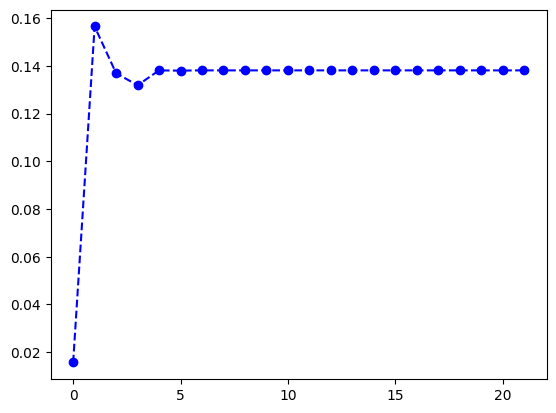

matrix([[1256.2336206 ],
        [ 346.97733432],
        [ 108.8256121 ],
        [   6.57469051],
        [   6.22735136],
        [   2.42566807],
        [   3.23437844],
        [   4.65482049],
        [  26.93968167],
        [  27.42816059],
        [  22.73562089],
        [  15.80582154],
        [  17.25887124],
        [  39.67762721],
        [ 120.67265808],
        [ 164.82470089],
        [ 420.52739769],
        [ 331.20978296],
        [1405.06875515],
        [1141.08707129]])

In [12]:
W  = nx.adjacency_matrix(G).todense()
#X0 = [[random.randint(0, 10)] for i in range(N)]
#X0 = [[random.random()] for i in range(N)]
#X0 = [[1] for i in range(N)]
X0 = [[i] for i in range(N)]
#X0 = [[i/N] for i in range(N)]

e = 0.001
alpha = 0.00001
theta = 0.9
mu = 0.99

gradient_tracking(
    W = W, 
    X0 = X0, 
    e = e, 
    alpha = alpha, 
    theta = theta,
    mu = mu,
    F = F,
    calc_delta_Fx = calc_delta_Fx,
    #calc_error_function = 'X_diff',
    calc_error_function = 'F_diff',
    max_iter=20,
    use_logging=True,
    need_graph=True
)

0 	X:	 [[-0.5348058   7.85019884  8.74540329  3.03421411  5.88849468  5.46640217
   8.31814847  6.02878845 -0.30193488  1.69968096  2.63312064 -0.24790674
   1.52683432  7.13170858 -0.75883454  5.71334729  8.5154895  -0.0414323
   7.98525141  0.07015901]]
0 	S:	 [[0.395551   0.10065741 0.06419381 0.00908315 0.00048898 0.00301342
  0.02343851 0.01886916 0.44182642 0.24360477 0.1920522  0.34354119
  0.10781753 0.01018917 0.27659345 0.11712431 0.13862525 0.21665725
  0.33485683 0.42637795]]
sum delta X:	 [0.15517303069165797]

1 	X:	 [[4.08243512 1.90996195 2.18685241 4.78427542 3.15072209 6.94627789
  5.47720342 2.20411479 2.57968451 0.60620726 0.37301913 2.16273671
  2.42090648 0.1152212  6.51582857 4.63717064 3.32115204 8.08919079
  0.05534902 6.97445325]]
1 	S:	 [[ 0.22422296 -0.14165891  0.07463794  0.0209201  -0.00907625  0.00599123
   0.03511201 -0.05582638  0.57272796 -0.06952853 -0.07842755  0.53669092
   0.15618361 -0.27412755  0.38947652 -0.11536674 -0.0586945   0.25172979
   0

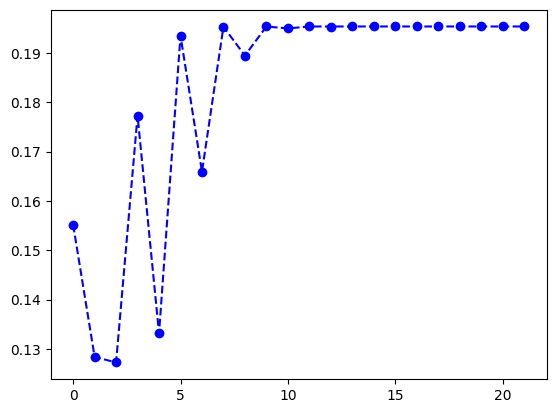

matrix([[200.29322917],
        [211.8428376 ],
        [ 17.32300261],
        [  3.96391612],
        [  1.10332077],
        [  0.96094218],
        [  0.77207597],
        [  1.06040073],
        [  6.12775329],
        [  5.81340803],
        [  5.13099536],
        [  3.6103306 ],
        [  3.17012652],
        [ 22.55823211],
        [ 21.01468847],
        [ 96.75620204],
        [ 70.26131729],
        [198.66471356],
        [224.63510702],
        [695.8400588 ]])

In [13]:
W  = nx.adjacency_matrix(G).todense()
X0 = [[random.randint(0, 10)] for i in range(N)]
#X0 = [[random.random()] for i in range(N)]
#X0 = [[1] for i in range(N)]
#X0 = [[i] for i in range(N)]
#X0 = [[i/N] for i in range(N)]

e = 0.001
alpha = 0.00001
theta = 0.9
mu = 0.99

gradient_tracking(
    W = W, 
    X0 = X0, 
    e = e, 
    alpha = alpha, 
    theta = theta,
    mu = mu,
    F = F,
    calc_delta_Fx = F,
    #calc_error_function = 'X_diff',
    calc_error_function = 'F_diff',
    max_iter=20,
    use_logging=True,
    need_graph=True
)